# This is our first lecture

### Solving simple ODE using different time stepping techniques
Many simple models are based on ordinary differential equations (ODEs), 
where some variables change in time - with the rate of change as function of their current values.

$$ \frac{dx(t)}{dt} = f(x(t)) $$

The simplest numerical method to solve such an equation is the (forward) Euler method, 
in which we convert this equation into an explicit time-stepping routine:   

$$  \frac{dx(t)}{dt} = \frac{x(t + \Delta t) - x(t)}{\Delta t} $$

and using approximation (Taylor expansion, first order) that $x(t+ \Delta t) \approx x(t) + \Delta t f(x(t))$  



### Advection and diffusion
In the ocean, atmosphere, ground water we can have unit volume that is moved from one location to antoher as result of advection by velocity. If we think of some tracer, or even temperature then
warm parcel of air can be moved from one location to another due to winds. If there are no winds temperature (or any tracer) will spread due to molecular diffusion.

Simple way to describe that is using mathematical formalism (ODE), and in our case we will limit ourselvs to 1D in time and space.
If we use $T$ for tracer (or temperature), then it is function of time and position: $T(t,x)$.


    

### Temperature 

If we want to describe temperature using some methematical (analytical) function, for example $sin(x)$ then we have to put that
into descrite values at some "grid" points along x-axis, $(x_1, x_2, .. x_n)$ and we can call that specific position "i" on the x axis $x_i$. Difference between points is $x_{i+1} - x_i = \delta x$, and in descrete space it is $\Delta x$.

Using simple function as $f(x) = sin(2 \pi x)$:



In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def temperature(x):
    return np.sin(2*np.pi *x)

Nx = 20        # this is numner of points (or grid cells) along x
Lx = 1.0       # this is total lenght of x (i.e. where we have sinus function)

deltax = Lx / Nx   # delta x = 1/20, step along x axis

xs = np.arange(0.025, Lx, deltax)    # create vector starting at 0.025 (this is center of cell), 
                                     # stepping with dx (1/20) till Lx 
xs, deltax

(array([0.025, 0.075, 0.125, 0.175, 0.225, 0.275, 0.325, 0.375, 0.425,
        0.475, 0.525, 0.575, 0.625, 0.675, 0.725, 0.775, 0.825, 0.875,
        0.925, 0.975]),
 0.05)

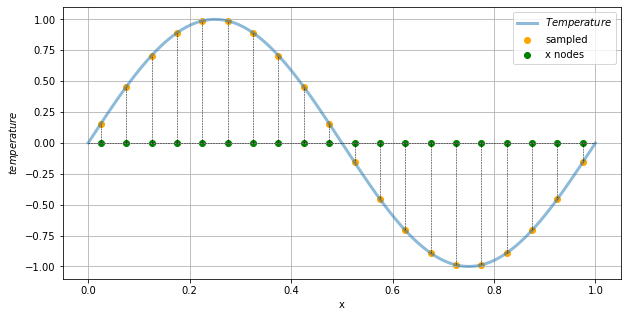

In [3]:
# example with simple sinus function 
t = np.arange(0,Lx, 0.0001)   # this is veeeery fine vector with 0.0001 step to show nice curve, 
plt.figure(figsize = (10, 5)) # similar to analytical
plt.plot(t, temperature(t), label = "$Temperature$", lw = 3, alpha = 0.5)
plt.scatter(xs, temperature(xs), label = "sampled", color = "orange")
plt.scatter(xs, np.zeros((xs.size)), color ="green", label = "x nodes")
plt.hlines(0,xmin=0, xmax = Lx, color = "black", ls = "--", lw = 0.5)
for x in xs:
    plt.plot([x, x], [0, temperature(x)], color = "black", ls = "--", lw = 0.5)
plt.xlabel("x")
plt.ylabel("$temperature$")
plt.grid()
plt.legend();

Note that sampled Temperature $T$ is representative for the cell as mean value. It is as the (spatial) average of $T_i$
 over the interval of positions between neighbouring grid points $x_i-\frac{\delta x}{2}$ and $x_i+\frac{\delta x}{2}$. 


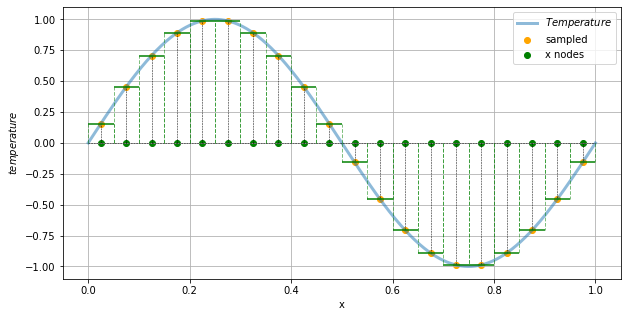

In [4]:
plt.figure(figsize = (10, 5))
plt.plot(t, temperature(t), label = "$Temperature$", lw = 3, alpha = 0.5)
plt.scatter(xs, temperature(xs), label = "sampled", color = "orange")
plt.scatter(xs, np.zeros((xs.size)), color ="green", label = "x nodes")
plt.hlines(0,xmin=0, xmax = Lx, color = "black", ls = "--", lw = 0.5)
for x in xs:
    plt.plot([x, x], [0, temperature(x)], color = "black", ls = "--", lw = 0.5)
    plt.hlines(temperature(x), xmin = x-deltax/2, xmax = x+deltax/2, color = "green")
    plt.vlines(x-deltax/2, ymin=0, ymax=temperature(x), color = "green", alpha = 0.5, ls="--", lw = 1)
    plt.vlines(x+deltax/2, ymin=0, ymax=temperature(x), color = "green", alpha = 0.5, ls="--", lw = 1)
plt.xlabel("x")
plt.ylabel("$temperature$")
plt.grid()
plt.legend();

### Mechanics of Advection
Imagine we have parcel of the volume (can be air, ocean ...) with some characteristic temperature $T$ and it is advected to the right with constant velocity $U$ (currents, winds anything).  
If we fix our attention at a single point in space, say the grid point $x_i$, the temperature there will vary over time due to the motion of the fluid. How it varies in time depends on the values at neighbouring grid points, since they determine how much heat will be transported into the current cell ($x_i$).

To calculate temperature at location "i" and time step "n+1", or shortly $T^{n+1}_i$ we can assume Taylor expansion to first order,
for temporal: $T^{n+1}_i \approx T(t_n + \delta t, x_i)$ and for spatial: $T^{n}_{i+1} \approx T(t_n, x_i + \delta x)$

Suppose the fluid is moving to the right with speed $U$. During a time step of duration $\delta t$, the temperature 
 at cell $i$ changes due to the amount of heat that leaves cell $i$, and the amount that enters that cell from  neighbours. 
Most of the fluid that starts within cell $i$ remains within that cell during the time step $\delta t$ 
(if the time step is short enough). 
Only fluid that is within a distance $U \delta t$ from the boundary of the cell will cross over that cell. 
So a proportion $U \delta t/\delta x$ of the amount in cell $i$ crosses the boundary.

Roughly $T^n_i U \delta t/\delta x$ will leave cell $i$ to the right cell $i+1$, 
and similarly $T^n_{i-1} U \delta t/\delta x$ will enter the cell from the left neighbour.

In that way we'll have for next time step (n+1): $ T^{n+1}_i = T^n_i - (T^n_i - T^n_{i-1}) U  \delta t/\delta x$

Rearanging that we get $ \frac{T^{n+1}_i - T^n_i }{\delta t} = - \frac{T^{n}_i - T^n_{i-1} }{\delta x} U $

in the limit when $\delta t$ and $\delta x$ goes to 0 we can write that as PDE:
    $\frac{\partial T(t,x)}{\partial t} = - U \frac{\partial T(t,x)}{\partial x} $
    
There are limited number of analytical solutions for PDE, and mostly we have to solve them numerically.


### Numerical solution 
if we use previous explicit expresion for temperature $T^{n+1}_i$ (at the next time step n+1) as a 
function of previous time step n and spatial values at neighbour grid points multiplied with some wieghts: 
$$ T^{n+1}_i = T^n_i - (T^n_i - T^n_{i-1}) U  \delta t/\delta x $$ then we can call vector for all points 
along x axis (i=1,..n) at the time step n $\bf T^n$  (or short $\bf T$ ) and similarly for next time step n+1 $\bf{T'}$
                                                                                                                   
Then we can write shorten version of equation for any location $i$:   
                                                                                                                   
$$ T′[i] = T[i] - \delta t * U * (T[i] - T[i-1]) / \delta x $$ 

We need to define what is happening at the boundary where $i = 0$ and $i = Nx$ (at the end $Lx$) 

In [5]:
# cyclic boundary conditions which is simply copying values at the [0] to the value [Nx]
# we are wrapping our solution such that at the end it enters back at the start like in torus

def advection(T, deltat, deltax, U):
    N = len(T)
    T2 = T.copy()
    
    for i in range(1, N):
        T2[i] = T[i] - deltat * U * (T[i]-T[i-1]) / deltax   # loop for all location along x [1,..N]
    # this is boundary state at left side [x=0]     
    T2[0] = T[0] - deltat * U * (T[0]-T[-1]) / deltax        # T[-1] is right side of the domain (at Lx), last cell
    
    return T2


In [6]:
deltat = 0.01
U = 0.2
initcondition = temperature(xs)

In [7]:
def plot_func(function, deltat, U, xs, steps, T0 = initcondition):
    T = T0.copy()
    deltax = xs[1] - xs[0]
    for step in range(steps):
        T = function(T, deltat, deltax, U)    
    plt.figure(figsize=(8,8))
    plt.plot(xs, T)
    plt.scatter(xs,T)
    plt.title("{}".format(step*deltat))
    plt.xlabel("t")
    plt.ylabel("x(t)")
    plt.ylim([-1,1])
    plt.grid()
    plt.tight_layout()
    plt.show()

In [11]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
interact(plot_func, 
         function = fixed(advection),
         steps = widgets.IntSlider(description="Timesteps", value = 1, min = 1, max = 1000, step = 1),
         deltat = fixed(deltat), 
         U = fixed(U),         
         xs = fixed(xs),
         T0 = fixed(advection(initcondition, deltat, xs[0], U)));

interactive(children=(IntSlider(value=1, description='Timesteps', max=1000, min=1), Output()), _dom_classes=('…

Well, this does not behave as we would expect, instead of preserving the shape of the profile over time, 
it is decaying. This is due to the way we are approximating with simple Euler method.

$$ T′[i] = T[i] - \delta t * U * (T[i] - T[i-1]) / \delta x $$

A better way to discretize the spatial derivative is using the following centered difference:
$$ T′[i] = T[i] - \delta t * U * (T[i+1] - T[i-1]) / 2\delta x $$ 

In [12]:
def advection2(T, deltat, deltax, U):
    N = len(T)
    T2 = T.copy()
    
    for i in range(1, N-1):
        T2[i] = T[i] - deltat * U * (T[i+1]-T[i-1]) / (2*deltax)
        
    T2[0] = T[0] - deltat * U * (T[1]-T[-1]) / (2*deltax)
    T2[-1] = T[-1] - deltat * U * (T[0]-T[-2]) / (2*deltax)
    
    return T2

In [13]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
interact(plot_func, 
         function = fixed(advection2),
         steps = widgets.IntSlider(description="Timesteps", value = 1, min = 1, max = 1000, step = 1),
         deltat = fixed(deltat), 
         U = fixed(U),         
         xs = fixed(xs),
         T0 = fixed(advection(initcondition, deltat, xs[0], U)));

interactive(children=(IntSlider(value=1, description='Timesteps', max=1000, min=1), Output()), _dom_classes=('…

### this is much better, and we call that 2nd order advection scheme